**NAME: CHEPKWONY VIOTRY**

**ADMN: 192744**

**UNIT CODE: DSA 8203, PRINCIPLES OF DATA SCIENCE**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#loading the dataset
df = pd.read_csv("/content/FinalData.csv")

In [ ]:
#First few rows of the data set
df.head()

,City,Center,Date,Year,Month,Season,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Yangon,7 Miles Mayangone,10/20/2019 0:00,2019,October,Rainy Season,29.60,44.27,52.87,95.67,49.64,122.59,0,0,0,0
1,Yangon,7 Miles Mayangone,10/21/2019 0:00,2019,October,Rainy Season,25.22,37.49,45.21,94.42,51.67,105.90,0,0,0,0
2,Yangon,7 Miles Mayangone,10/22/2019 0:00,2019,October,Rainy Season,24.46,35.84,42.32,95.40,49.26,101.84,0,0,0,0
3,Yangon,7 Miles Mayangone,10/23/2019 0:00,2019,October,Rainy Season,23.42,34.53,41.37,96.39,48.06,98.17,0,0,0,0
4,Yangon,7 Miles Mayangone,10/24/2019 0:00,2019,October,Rainy Season,38.29,56.55,68.59,93.70,57.11,151.54,0,0,0,0


In [ ]:
#Descriptive Statistics of the data set
df.describe().round(2)

,Year,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,5122.00,5122.00,5122.00,5122.00,5122.00,5122.00,5122.00,5122.00,5122.00,5122.00,5122.00
mean,2019.81,19.18,28.92,33.40,91.19,53.36,78.11,150.76,3444.09,3.57,78.64
std,0.39,16.62,25.70,29.09,3.84,9.86,51.76,384.22,9865.15,9.54,236.36
min,2019.00,0.00,0.00,0.00,70.48,19.68,0.00,0.00,0.00,0.00,0.00
25%,2020.00,5.84,8.36,9.29,89.16,46.68,34.81,0.00,0.00,0.00,0.00
50%,2020.00,19.18,28.92,33.40,91.19,53.36,86.37,0.00,181.00,0.00,6.00
75%,2020.00,27.48,41.22,50.24,92.87,60.04,115.08,7.75,359.00,0.00,6.00
max,2020.00,105.79,189.86,211.29,105.14,77.04,240.01,2158.00,51496.00,48.00,1219.00


**PART I**

**QUESTION 0NE**:Is there an example of an outlier in your data that surprised you? Why?


Yes, there is an example of an outlier in the dataset that stands out and is surprising that is the AQI value of 240.01."Very unhealthy" conditions are indicated by values exceeding 200 on the Air Quality Index (AQI), which normally runs from 0 to 500. The unexpected outlier AQI of 240.01 indicates a severe pollution occurrence or a reporting anomaly because it differs significantly from the dataset's average values.Such a high AQI could signal a critical environmental or public health concern, possibly linked to specific events such as industrial emissions, wildfires, or weather conditions.


In [ ]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Check for outliers in numeric columns
numeric_columns = ['PM1_0', 'PM2_5', 'PM10', 'Temperature_F', 'Humidity_%', 'AQI']
outliers = detect_outliers_iqr(df, numeric_columns)

# Display outliers
print("Outliers detected:")
for key, value in outliers.items():
    print(f"{key}:\n{value}\n")

Outliers detected:
PM1_0:
110     63.35
111     79.23
112     63.49
113     61.72
118     64.90
        ...  
4913    81.01
4914    77.08
4915    72.82
4916    65.79
4919    60.95
Name: PM1_0, Length: 153, dtype: float64

PM2_5:
109     111.80
110      92.48
111     116.53
112      93.56
113      91.25
         ...  
4914    118.21
4915    119.16
4916    106.05
4918     94.37
4919     96.94
Name: PM2_5, Length: 154, dtype: float64

PM10:
111     131.69
118     116.01
119     112.68
125     134.55
126     122.55
         ...  
4910    113.97
4913    152.46
4914    141.70
4915    131.17
4916    114.62
Name: PM10, Length: 74, dtype: float64

Temperature_F:
48      83.57
49      82.76
50      82.93
51      82.98
198     98.76
        ...  
5071    98.83
5072    98.51
5075    98.68
5079    99.46
5099    98.64
Name: Temperature_F, Length: 397, dtype: float64

Humidity_%:
3402    19.68
3403    20.23
3404    21.49
3405    26.50
Name: Humidity_%, dtype: float64

AQI:
4897    240.01
Name: AQI, d

**QUESTION TWO**: Look at some of the histograms for your data? How would you explain one of them to someone who is not familiar with your data?

If we look at the histograms for PM1.0, PM2.5, and PM10, all of them shows a right-skewed distribution. Here’s how I would explain this to someone unfamiliar with the data:A right-skewed histogram means most of the data points are concentrated on the left side (lower values), with a "tail" extending toward higher values on the right. In the histograms for PM1.0, PM2.5, and PM10, the majority of the particulate matter (PM) measurements are relatively low, clustering around a lower range. However, there are some larger values that occur less frequently, which stretch the distribution toward higher levels.This suggests that the air quality is generally moderate, with occasional spikes in particulate matter. These higher values could be due to specific events like increased vehicle emissions, industrial activity, or weather conditions.

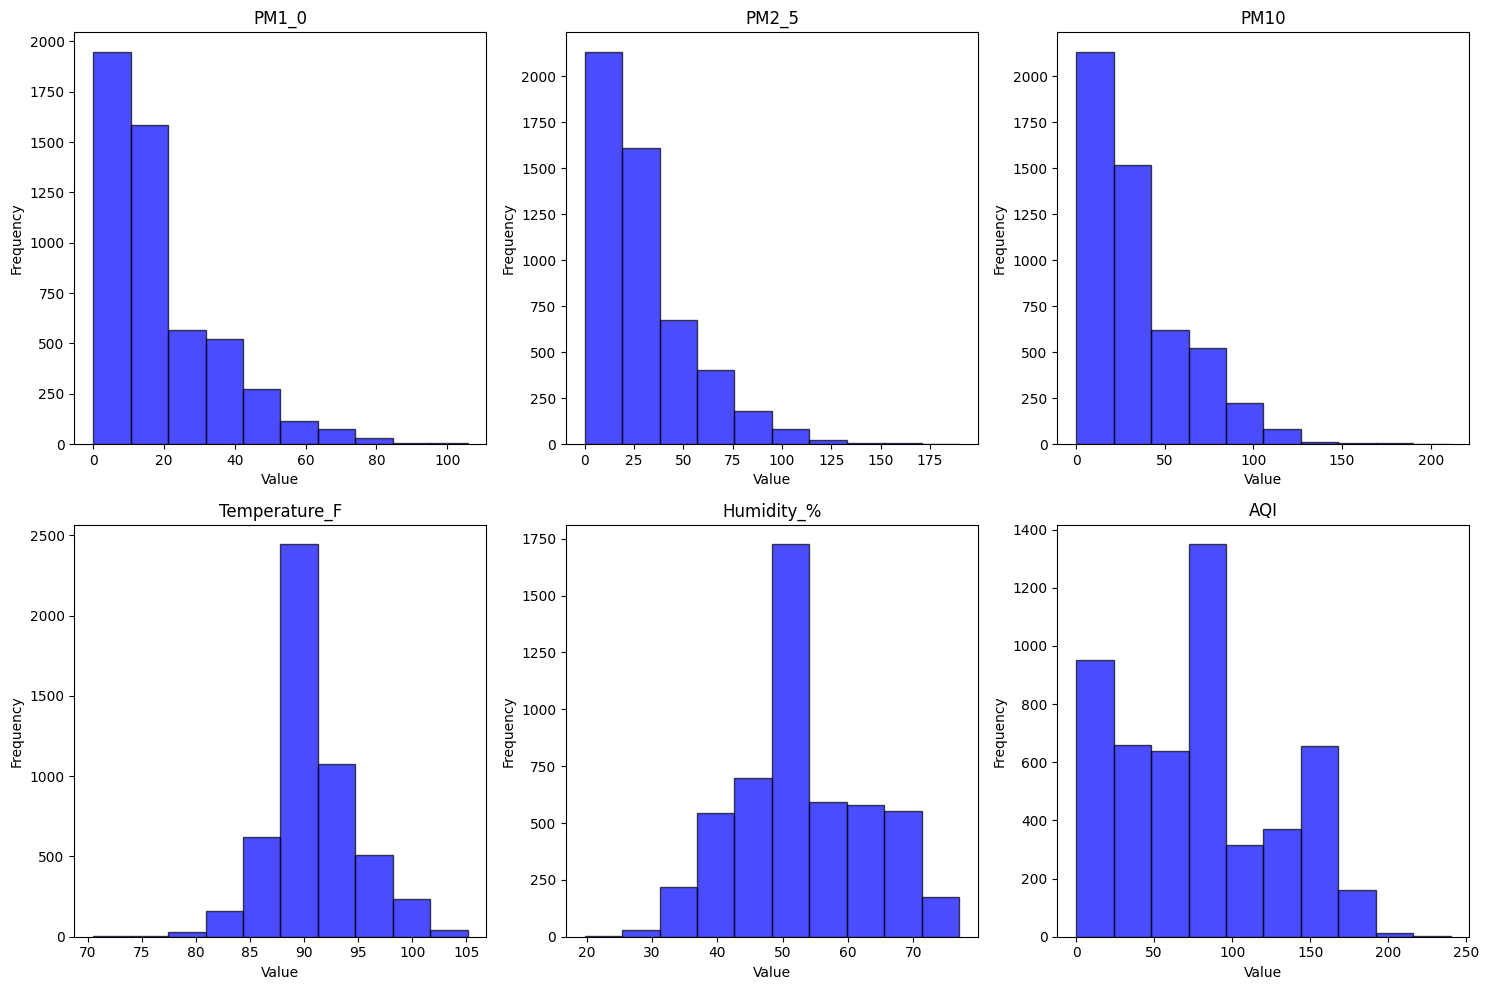

In [ ]:
# Plot histograms
columns_to_plot = ['PM1_0', 'PM2_5', 'PM10', 'Temperature_F', 'Humidity_%', 'AQI']
num_columns = len(columns_to_plot)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust rows, cols, and figure size

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot each histogram
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column], bins=10, color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

**QUESTION THREE**:Is there a relationship between two columns of your data that you didn't expect? How would you explain it?

One surprising correlation in my dataset is the correlation between PM10 and AQI with a strong positive value of 0.962518. This indicates a very high linear relationship between PM10 levels and the Air Quality Index (AQI), suggesting that changes in PM10 are closely tied to changes in AQI values.This strong correlation is expected to some extent because PM10 is a component that contributes to the AQI calculation. However, its magnitude being this high might suggest that PM10 has an outsized influence on AQI compared to other factors like PM2.5 or PM1.0

                       Year     PM1_0     PM2_5      PM10  Temperature_F  \
Year               1.000000 -0.151108 -0.135614 -0.150614       0.161272   
PM1_0             -0.151108  1.000000  0.990829  0.992713      -0.147339   
PM2_5             -0.135614  0.990829  1.000000  0.992651      -0.152696   
PM10              -0.150614  0.992713  0.992651  1.000000      -0.144156   
Temperature_F      0.161272 -0.147339 -0.152696 -0.144156       1.000000   
Humidity_%         0.103101 -0.579300 -0.579195 -0.598524      -0.284453   
AQI               -0.195133  0.953716  0.949992  0.962518      -0.107924   
New_cases          0.186922 -0.216421 -0.208428 -0.219496      -0.037345   
Cumulative_cases   0.165491 -0.187094 -0.181571 -0.190815      -0.039541   
New_deaths         0.178472 -0.209251 -0.201423 -0.211869      -0.035040   
Cumulative_deaths  0.157740 -0.176159 -0.171260 -0.179784      -0.037285   

                   Humidity_%       AQI  New_cases  Cumulative_cases  \
Year           

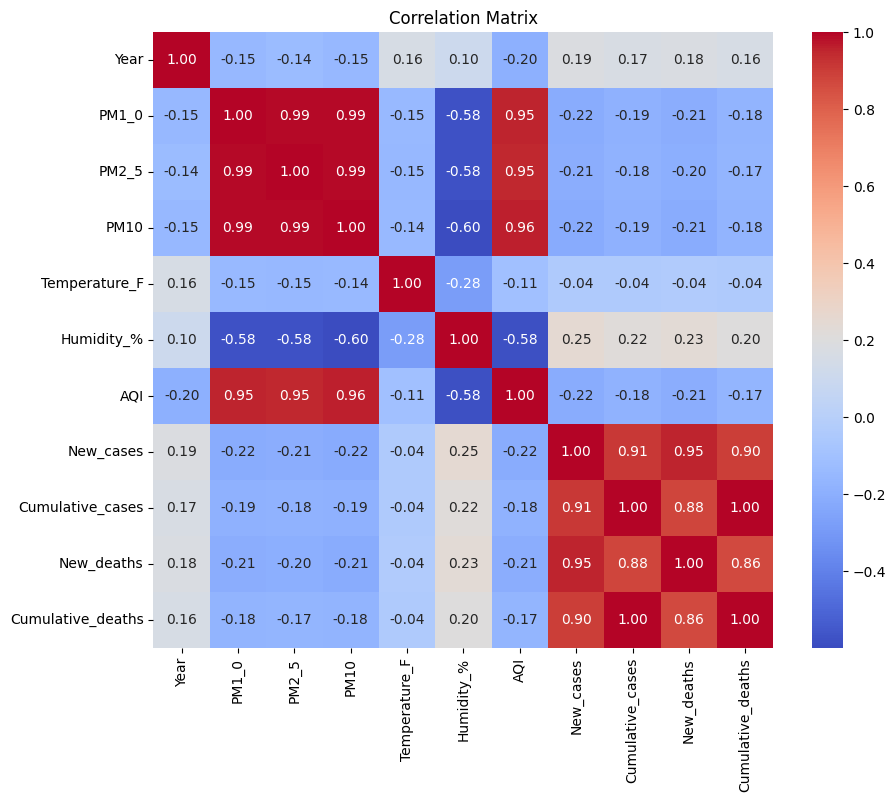

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()
# Print correlation matrix
print(correlation_matrix)
# Optional: Visualize the correlation matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**PART II**

**QUESTION**: In two to three sentences (include them in your Colab notebook) highlight your biggest take away from the video.


The biggest takeaway from the video is that generative AI and self-service analytics are becoming essential differentiators in modern businesses, enabling data-driven decision-making through natural language interfaces and reducing dependency on technical expertise like SQL. The speaker emphasized the importance of ethical data usage, cost considerations, accuracy challenges, and the need for structured professional development to ensure organizations effectively adopt and leverage AI technologies.